## HW0 – Environment Check

Run the cells below to verify that your software stack is ready for the course.

### What the cell does

1. **Imports core libraries** — `torch`, `pandas`, `matplotlib`, and `scikit-learn`.  
   *If any import fails, revisit the environment-setup instructions.*

2. **Reports basic system info**  
   - Prints the PyTorch version.  
   - Indicates whether a CUDA-capable GPU is visible (`True` = GPU available).

3. **Loads a biomedical dataset**  
   - We use the **Wisconsin Breast-Cancer dataset** (569 patient samples, 30 numeric tumor-cell features).  
   - Each sample is labeled *malignant* or *benign*.  
   - The dataset is small enough to load instantly but rich enough to visualise typical diagnostic features.

4. **Produces a quick scatter-matrix plot**  
   - Plots four representative features, coloured by diagnostic label.  
   - Confirms that `matplotlib` renders correctly in your notebook.

> **Expected outcome:**  
> - A short printout with library versions and dataset shape.  
> - A 3 × 3 grid of scatter plots.  
> - **No errors** in the cell output.

If everything runs smoothly, your environment is ready for the first graded assignment.


In [6]:
# HW0 – Environment check
# ------------------------------------------------------------
# 1) Core imports
import torch            # still check Torch is installed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

print("PyTorch version :", torch.__version__)
print("CUDA available  :", torch.cuda.is_available())

# ------------------------------------------------------------
# 2) Load the Wisconsin Breast-Cancer dataset
data   = load_breast_cancer(as_frame=True)
df     = data.frame            # pandas DataFrame
labels = data.target           # 0 = malignant, 1 = benign

print("Dataset shape   :", df.shape)
print("Classes         :", data.target_names.tolist())


PyTorch version : 2.3.1
CUDA available  : True
Dataset shape   : (569, 31)
Classes         : ['malignant', 'benign']


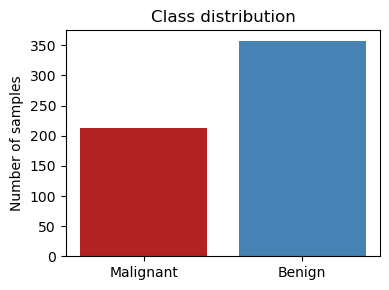

,mean,std,min,max
mean radius,14.127292,3.524049,6.98100,28.11000
mean texture,19.289649,4.301036,9.71000,39.28000
mean perimeter,91.969033,24.298981,43.79000,188.50000
mean area,654.889104,351.914129,143.50000,2501.00000
mean smoothness,0.096360,0.014064,0.05263,0.16340
mean compactness,0.104341,0.052813,0.01938,0.34540
mean concavity,0.088799,0.079720,0.00000,0.42680
mean concave points,0.048919,0.038803,0.00000,0.20120
mean symmetry,0.181162,0.027414,0.10600,0.30400
mean fractal dimension,0.062798,0.007060,0.04996,0.09744


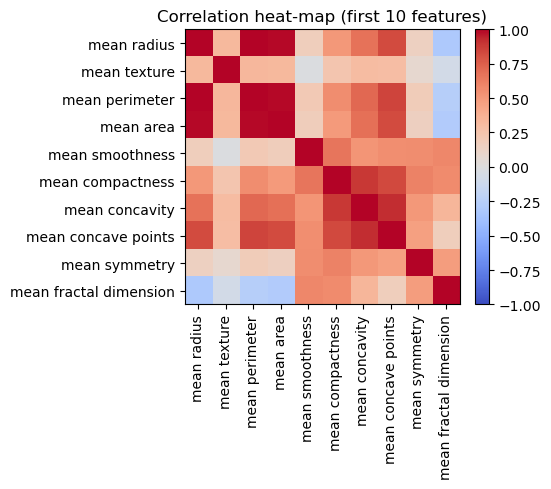

In [7]:
# ------------------------------------------------------------------
# 3) Exploratory overview
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# --- 3.1  Class distribution -------------------------------------
class_counts = labels.value_counts().sort_index()
plt.figure(figsize=(4, 3))
plt.bar(class_counts.index.map({0: "Malignant", 1: "Benign"}),
        class_counts.values,
        color=["firebrick", "steelblue"])
plt.ylabel("Number of samples")
plt.title("Class distribution")
plt.tight_layout()
plt.show()

# --- 3.2  Summary statistics --------------------------------------
# Display mean, std, min, max for every feature (first 10 shown)
display(df.describe().T[['mean', 'std', 'min', 'max']].head(10))

# --- 3.3  Correlation heat-map (first 10 features) ----------------
corr = df.iloc[:, :10].corr()

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Correlation heat-map (first 10 features)")
plt.tight_layout()
plt.show()

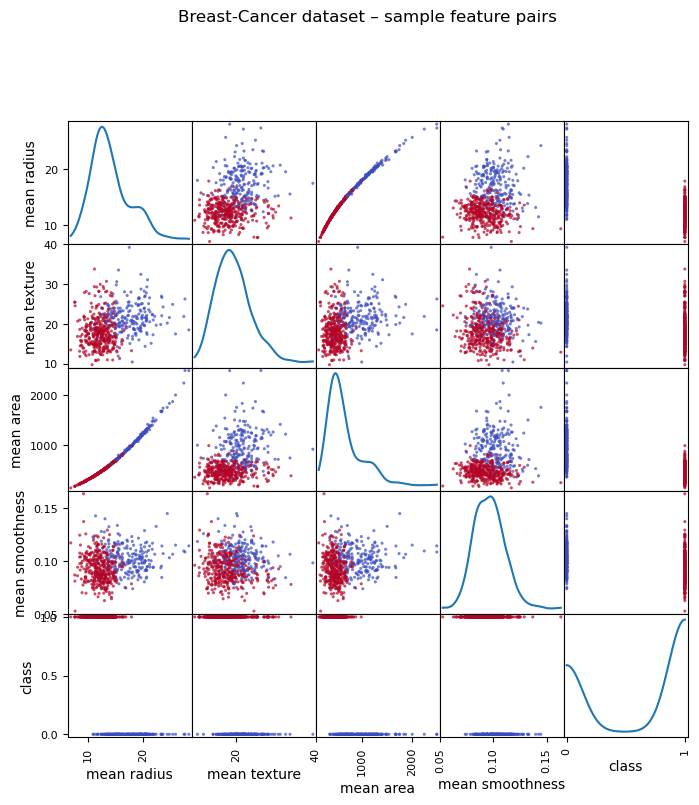

In [8]:
# ------------------------------------------------------------
# 4) Quick visual sanity check
features_to_plot = ["mean radius", "mean texture",
                    "mean area",   "mean smoothness"]

pd.plotting.scatter_matrix(
    df[features_to_plot].join(labels.rename("class")),
    figsize=(8, 8),
    diagonal="kde",
    s=20,
    c=labels,
    cmap="coolwarm",
    alpha=0.7
)
plt.suptitle("Breast-Cancer dataset – sample feature pairs", y=1.02)
plt.show()